In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
def fourier_transform(img):
    ro = img.shape[0]
    co = img.shape[1]
    img_fil = np.zeros((ro, co), dtype=np.complex128)
    for i in range(ro):
        for w in range(co):
            val = 0
            for r in range(ro):
                for c in range(co):
                    val += img[r, c] * np.exp(-2j * np.pi * ((r * i / ro) + (c * w / co)))
            img_fil[i, w] = val
    return img_fil

In [9]:
def fourier_inverse(image_fil):
    ro, co = image_fil.shape
    img_reconstructed = np.zeros_like(image_fil, dtype=np.complex128)
    j = 1j
    for i, row in enumerate(img_reconstructed):
        for w, _ in enumerate(row):
            val = 0
            for r, row_fil in enumerate(image_fil):
                for c, col_fil in enumerate(row_fil):
                    val2 = 2 * np.pi * ((r * i / ro) + (c * w / co))
                    val += col_fil * np.exp(j * val2)
            img_reconstructed[i, w] = val / (ro * co)
    return img_reconstructed.real

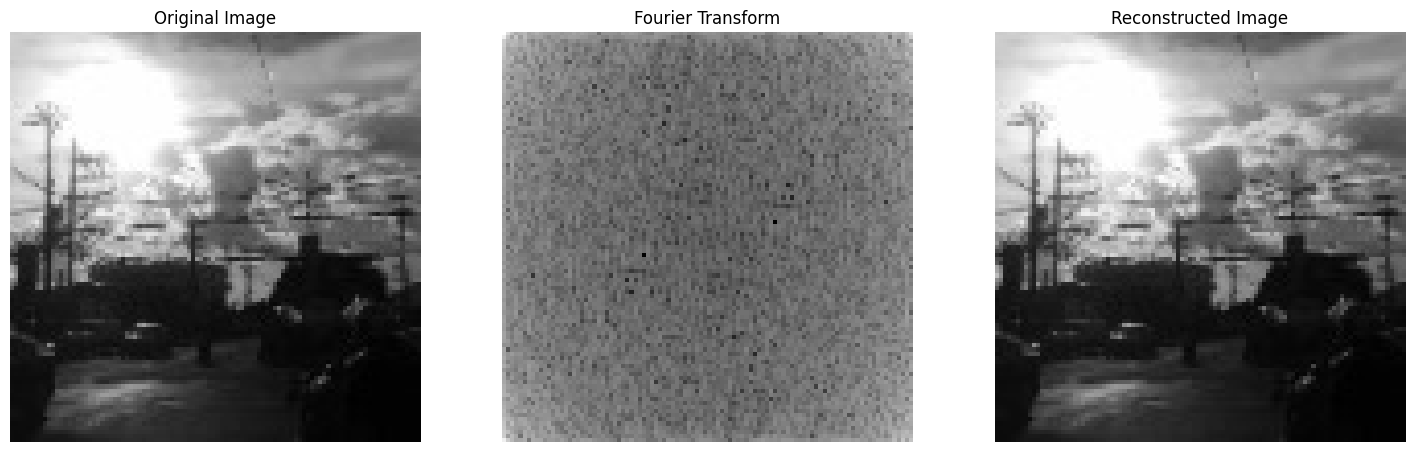

In [8]:
img = cv2.imread('/content/WhatsApp Image 2024-05-21 at 9.31.48 PM.jpeg', 0)

# Perform Fourier Transform
img_fourier = fourier_transform(img)

# Perform Inverse Fourier Transform
img_reconstructed = fourier_inverse(img_fourier)

# Plotting
plt.figure(figsize=(18, 6))

# Original Image
plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Fourier Transform
plt.subplot(1, 3, 2)
plt.imshow(np.log(1 + np.abs(img_fourier)), cmap='gray')
plt.title('Fourier Transform')
plt.axis('off')

# Reconstructed Image
plt.subplot(1, 3, 3)
plt.imshow(img_reconstructed, cmap='gray')
plt.title('Reconstructed Image')
plt.axis('off')

plt.show()
